# Adding water vapor feedback
  
We return to the energy balance equation but this time write the OLR term as a function of the atmospheric emissivity:
  
  \begin{equation}
  C \frac{dT}{dt} = \frac{S_0}{4} [ 1 - \alpha(T)]  - (1-\epsilon /2) \sigma T^4
  \end{equation}
 
 The atmospheric emissivity is related to the optical depth by Beer-Lambert law:
 
 \begin{equation}
  \epsilon = 1-e^{-\tau}
\end{equation}
  
 and we will specify the optical depth as a temperature-dependent function that represents the increase of water vapor specific humidity with temperature added to a constant value that represents the effects of clouds and other greenhouse gases:
 
 \begin{equation}
  \tau = 0.56 + 0.07 \exp \big [ - \frac{L_v}{R_v}  \big( \frac{1}{T} - \frac{1}{288} \big ) \big ] 
  \end{equation}

 $\tau(T)$ includes a part that is constant (greenhouse gases and clouds) and a variable part that is proportional to water vapor pressure.  Remember that $R_v = 461.5$ J kg$^{-1}$ K$^{-1}$ and $L_v = 2.5 \times 10^6$ J kg$^{-1}$.

NameError: name 'Lv' is not defined

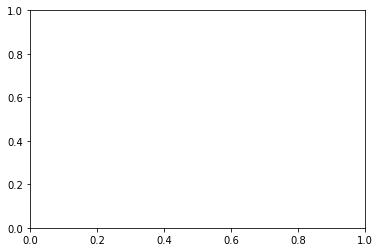

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def tau(T):
    """optical depth as function of temperature"""
    return 0.56+0.07*np.exp(-Lv*(1/T-1/288)/Rv)

def emiss(tau):
    """effective emissivity as function of optical depth"""
    return 0.5+exp(-tau)/2.


def cdTdt(S,T):
    """define the energy balance equation in a function"""
    return S*(1-alpha(T))/4 - eps_e*sigma*np.power(T,4)

# vector of surface temperatures
Ts=np.arange(200,400,5)

# vector of albedos
fig,ax=plt.subplots()

ax.plot(Ts,tau(Ts))
ax.set_xlabel("Ts (K)")
ax.set_ylabel("Tau")



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Lv=2.5e6
Rv=461.5
sigma=5.67e-8

def alfa(T):
    albedo=0.45-0.25*np.tanh((T-272)/23)
    return albedo 

def tau(T):
    #tau=0.56+0.07*np.exp(-Lv/Rv*(1/T-1/288))
    tau=0.63
    return tau

# define the solar constant array
S0=np.arange(1000,2000,10)
Ts=np.arange(200,400,5)

T2d=np.tile(Ts,(len(S0),1)).transpose()
S2d=np.tile(S0,(len(Ts),1))

DTdt=S2d*(1-alfa(T2d))/4 - 0.69*sigma*T2d**4 #/(1+tau(T2d))

fig,ax=plt.subplots()
X=ax.contour(S0,T,DTdt,levels=np.arange(-200,400,25))
ax.clabel(X,fontsize=10)
ax.set_xlabel("S0 (Wm$^{-2}$)")
ax.set_ylabel("T (K)")